In [27]:
from medigan import Generators
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import os
from google.colab import files
generators = Generators()

In [28]:
dataloader_brain = generators.get_as_torch_dataloader(model_id=7, num_samples=1, prefetch_factor = None, install_dependencies=True)

In [29]:
dataloader_mass_mark = generators.get_as_torch_dataloader(model_id= 4,num_samples=1, prefetch_factor = None, install_dependencies=True)

In [30]:
dataloader_polyps = generators.get_as_torch_dataloader(model_id= 9,num_samples=1, prefetch_factor = None, install_dependencies=True)

In [31]:
dataloader_lung_nodules = generators.get_as_torch_dataloader(model_id= 17,num_samples=1, prefetch_factor = None, install_dependencies=True)

In [32]:
dataloader_chest_xray = generators.get_as_torch_dataloader(model_id= 19,num_samples=1, prefetch_factor = None, install_dependencies=True)

In [33]:
def convert_to_img1(dataloader,model_id, flag):

  plt.figure()

  folder_path1 = f"/content/samp_data{model_id}"
  os.makedirs(folder_path1, exist_ok=True)
  folder_path2 = f"/content/mask_data{model_id}"
  os.makedirs(folder_path2, exist_ok=True)

  for batch_idx, data_dict in enumerate(dataloader):
      sample = np.squeeze(data_dict.get("sample"))
      mask = np.squeeze(data_dict.get("mask"))
      plt.imshow(sample, cmap='gray')
      plt.axis('off')
      image_path1 = os.path.join(folder_path1, f"sample{flag}_{model_id}.png")
      plt.savefig(image_path1)
      files.download(image_path1)
      plt.imshow(mask, cmap='gray')
      plt.axis('off')
      image_path2 = os.path.join(folder_path2, f"mask{flag}_{model_id}.png")
      plt.savefig(image_path2)
      files.download(image_path2)
      plt.close()
      break

In [34]:
def convert_to_img2(dataloader,model_id, flag):

  folder_path1 = f"/content/samp_data{model_id}"
  os.makedirs(folder_path1, exist_ok=True)

  plt.figure(figsize=(15,5))
  data_dict = next(iter(dataloader))
  sample = np.squeeze(data_dict.get("sample"))
  plt.imshow(sample, cmap='gray')
  plt.axis('off')
  image_path1 = os.path.join(folder_path1, f"sample{flag}_{model_id}.png")
  plt.savefig(image_path1)
  files.download(image_path1)
  plt.close()

In [35]:
similar_words1 = ['brain', 'tumor']
similar_words2 = ['breast', 'mass', 'cell']
similar_words3 = ['Polyps', 'mask']
similar_words4 = ['lung', 'nodules']
similar_words5 = ['chest', 'x-ray']

In [39]:
def main():
  print("Synthetic Medical Image Generator:")
  print("Generatable Datasets: ")
  print(" ")
  print("--> Brain tumor with Segmentation")
  print("--> Breast Mass Cells with Masking and Segmentation")
  print("--> Polyps with Segmentation")
  print("--> Lung Nodules")
  print("--> Chest X-ray")
  prompt = list(str(input()).split())
  index = 0
  for i in range(len(prompt)):
    if prompt[i] in similar_words1:
      index = 1
      break
    elif prompt[i] in similar_words2:
      index = 2
      break
    elif prompt[i] in similar_words3:
      index = 3
      break
    elif prompt[i] in similar_words4:
      index = 4
      break
    elif prompt[i] in similar_words5:
      index = 5
      break

  if index == 0:
    print("Enter a valid prompt")
  else:
    num_images = None
    for word in prompt:
      if word.isdigit():
        num_images = int(word)
        break
      if num_images is None:
        num_images = 1

    if index == 1:
      flag = 1
      for i in range(num_images):
        dataloader_brain = generators.get_as_torch_dataloader(model_id=7, num_samples=1, prefetch_factor = None, install_dependencies=True)
        convert_to_img1(dataloader_brain, 7, flag)
        flag += 1
      print("Image successfully generated")
      print("Here is a sample of the generated image: ")
      print(" ")
      print("Sample data:")
      img = mpimg.imread('/content/samp_data7/sample1_7.png')
      plt.imshow(img)
      plt.axis('off')
      plt.show()
      print(" ")
      print("Mask data:")
      img = mpimg.imread('/content/mask_data7/mask1_7.png')
      plt.imshow(img)
      plt.axis('off')
      plt.show()

    elif index == 2:
      flag = 1
      for i in range(num_images):
        dataloader_mass_mark = generators.get_as_torch_dataloader(model_id= 4,num_samples=1, prefetch_factor = None, install_dependencies=True)
        convert_to_img1(dataloader_mass_mark, 4, flag)
        flag += 1
      print("Image successfully generated")
      print("Here is a sample of the generated image: ")
      print(" ")
      print("Sample data:")
      img = mpimg.imread('/content/samp_data4/sample1_4.png')
      plt.imshow(img)
      plt.axis('off')
      plt.show()
      print(" ")
      print("Mask data:")
      img = mpimg.imread('/content/mask_data4/mask1_4.png')
      plt.imshow(img)
      plt.axis('off')
      plt.show()

    elif index == 3:
      flag = 1
      for i in range(num_images):
        dataloader_polyps = generators.get_as_torch_dataloader(model_id= 9,num_samples=1, prefetch_factor = None, install_dependencies=True)
        convert_to_img1(dataloader_polyps, 9, flag)
        flag += 1
      print("Image successfully generated")
      print("Here is a sample of the generated image: ")
      print(" ")
      print("Sample data:")
      img = mpimg.imread('/content/samp_data9/sample1_9.png')
      plt.imshow(img)
      plt.axis('off')
      plt.show()
      print(" ")
      print("Mask data:")
      img = mpimg.imread('/content/mask_data9/mask1_9.png')
      plt.imshow(img)
      plt.axis('off')
      plt.show()

    elif index == 4:
      flag = 1
      for i in range(num_images):
        dataloader_lung_nodules = generators.get_as_torch_dataloader(model_id= 17,num_samples=1, prefetch_factor = None, install_dependencies=True)
        convert_to_img2(dataloader_lung_nodules, 17, flag)
        flag += 1
      print("Image successfully generated")
      print("Here is a sample of the generated image: ")
      print(" ")
      print("Sample data:")
      img = mpimg.imread('/content/samp_data17/sample1_17.png')
      plt.imshow(img)
      plt.axis('off')
      plt.show()

    elif index == 5:
      flag = 1
      for i in range(num_images):
        dataloader_chest_xray = generators.get_as_torch_dataloader(model_id= 19,num_samples=1, prefetch_factor = None, install_dependencies=True)
        convert_to_img2(dataloader_chest_xray, 19, flag)
        flag += 1
      print("Image successfully generated")
      print("Here is a sample of the generated image: ")
      print(" ")
      print("Sample data:")
      img = mpimg.imread('/content/samp_data19/sample1_19.png')
      plt.imshow(img)
      plt.axis('off')
      plt.show()

Synthetic Medical Image Generator:
Generatable Datasets: 
--> Brain tumor with Segmentation
--> Breast Mass Cells with Masking and Segmentation
--> Polyps with Segmentation
--> Lung Nodules
--> Chest X-ray
Generate 2 images of brain tumor with segmentation


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Image successfully generated
Here is a sample of the generated image: 
Sample data:


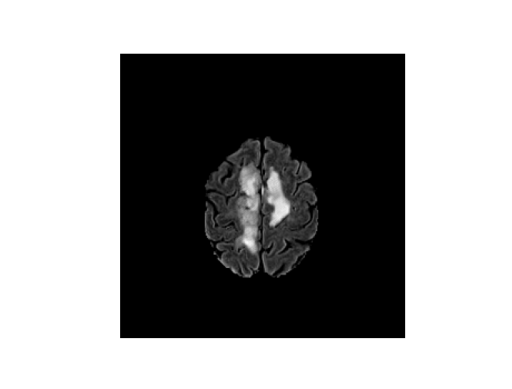

Mask data:


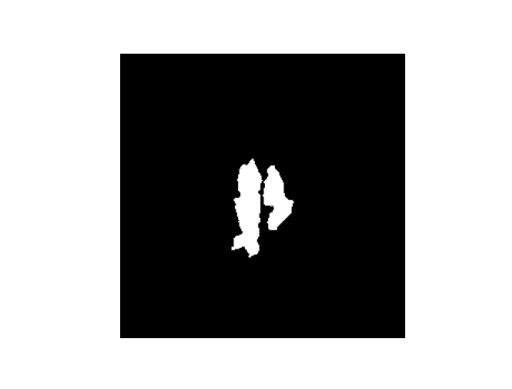

In [40]:
main()